In [26]:
import torch
from torchvision import transforms
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import train_infer_utils
import utils
from model import UNet
from config import Config

In [2]:
model = UNet(Config.channels, Config.channels, Config.time_dim)
model.load_state_dict(torch.load(Config.model_path))

<All keys matched successfully>

In [21]:
reverse_trans = transforms.ToPILImage()

imgs = train_infer_utils.sample(model, img_size=28, channels=1, batch_size=2)


sampling loop time step: 100%|██████████| 200/200 [00:14<00:00, 14.26it/s]


In [23]:
print(len(imgs))
print(imgs[0].shape)

200
torch.Size([2, 1, 28, 28])


MovieWriter ffmpeg unavailable; using Pillow instead.


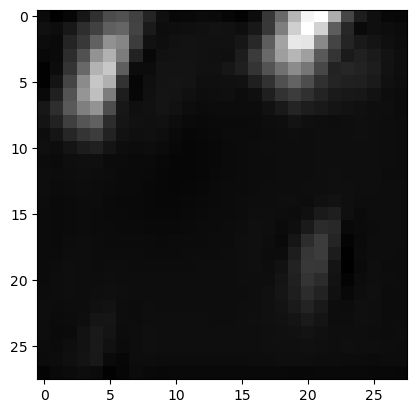

In [29]:
random_index = 0

fig = plt.figure()
ims = []
for i in range(Config.timesteps):
    im = plt.imshow(
        imgs[i][random_index].reshape(Config.img_size, Config.img_size, Config.channels), 
        cmap="gray", animated=True
        )
    ims.append([im])

animate = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
animate.save('diffusion.gif')
plt.show()